In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
import geopandas as gpd


In [4]:
output_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/"

/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_75308/1393422011.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


EPSG:4326


/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_75308/1393422011.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_75308/1393422011.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


EPSG:4326
EPSG:4326


/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_75308/1393422011.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_75308/1393422011.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


EPSG:4326
EPSG:4326


/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_75308/1393422011.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_75308/1393422011.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


EPSG:4326
EPSG:4326


/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_75308/1393422011.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


EPSG:4326


/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_75308/1393422011.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


EPSG:4326


/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_75308/1393422011.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


EPSG:4326


/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_75308/1393422011.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


EPSG:4326


/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_75308/1393422011.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


EPSG:4326


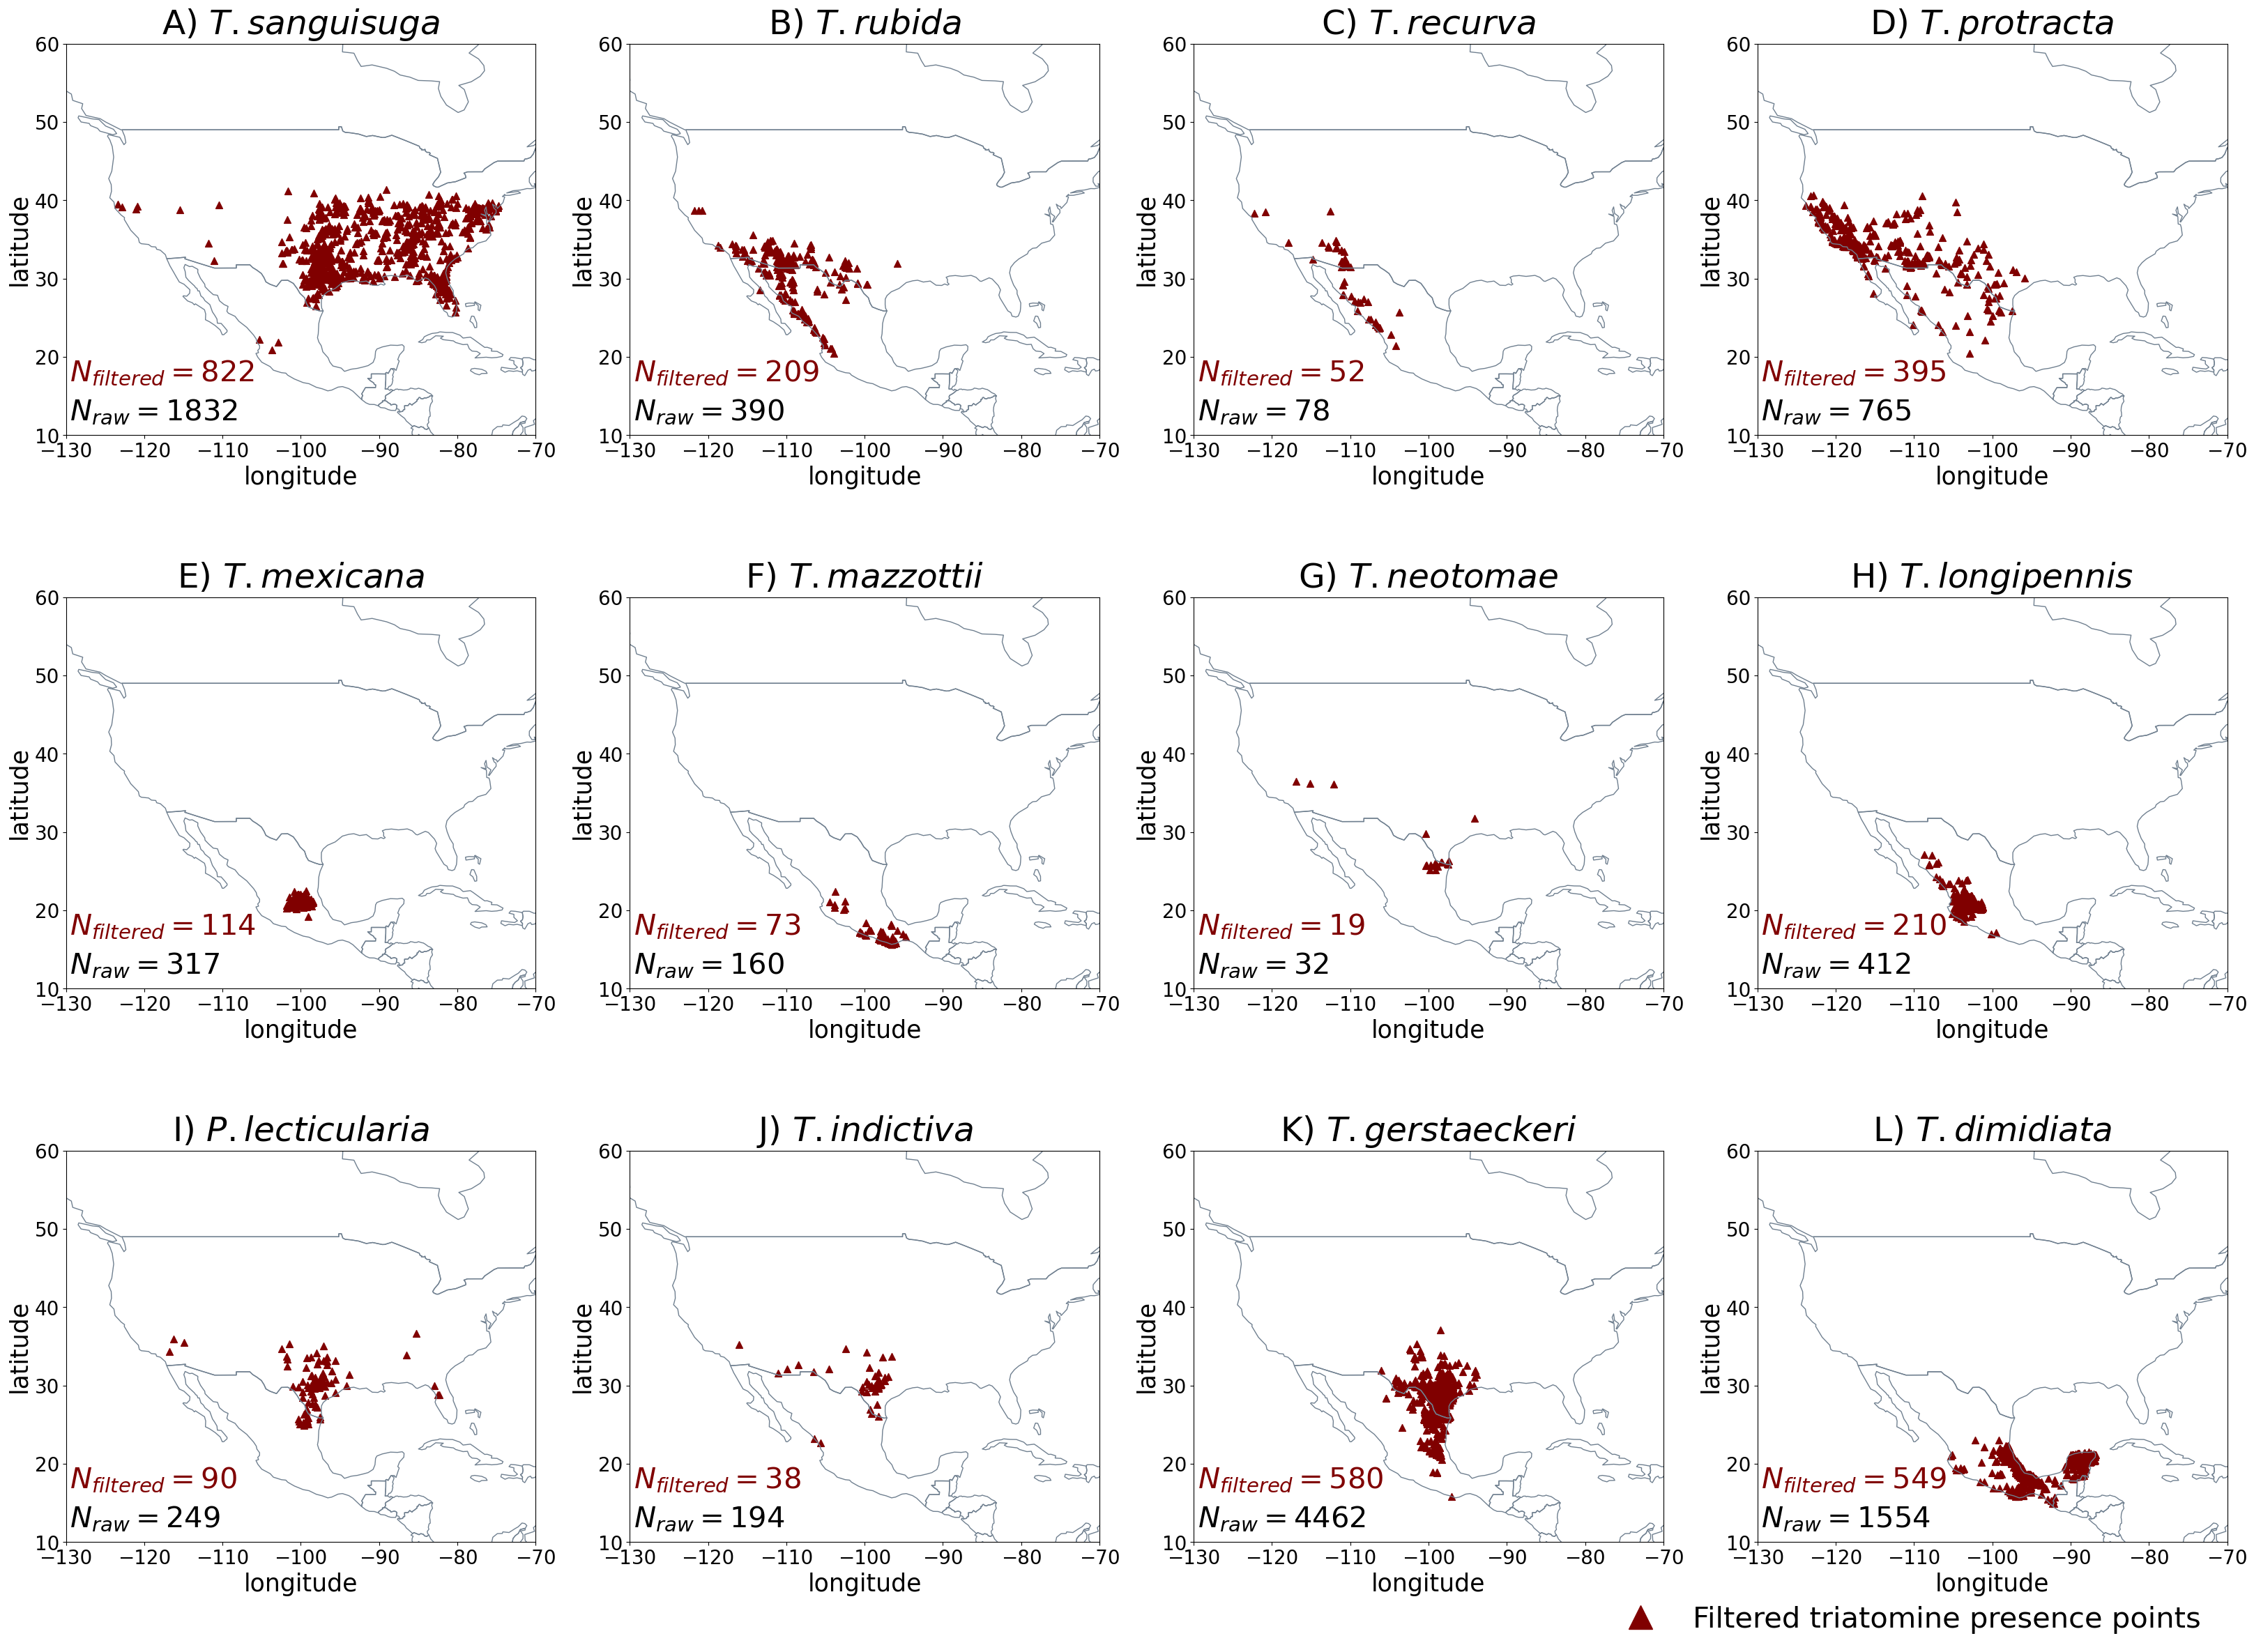

In [9]:
fig, ax = plt.subplots(3,4, figsize=(40,30))


sp_rarefied_name_list = ['san','rub','rec','pro','mex','maz','neo','lon','lec','ind','ger','dim']
sp_rarefied_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. neotomae','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
bug_name_list = ["sanguisuga","rubida","recurva","protracta","mexicana","mazzottii","neotomae","longipennis","lecticularia","indictiva","gerstaeckeri","dimidiata"]
for i in range(len(sp_rarefied_name_list)):
    
    ax_0 = i // 4
    ax_1 = i % 4


    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    print(world.crs)
    world.boundary.plot(ax=ax[ax_0,ax_1], color = 'slategrey',linewidth=1)

    this_title = sp_rarefied_name_list_full[i]
    ax[ax_0,ax_1].set_title(label_list[i]+') '+'$\it{%s}$'%this_title,fontsize=35,y=1.01)

    sp_path_raw = "/Users/liting/Documents/GitHub/Clean_species_data/data/final_data/northAmerica_"+bug_name_list[i]+'.csv'
    pre_select_raw = pd.read_csv(sp_path_raw)
    number_points_raw = len(pre_select_raw)

    sp_path_filter = "/Users/liting/Documents/GitHub/Clean_species_data/data/spthin/"+sp_rarefied_name_list[i]+'.csv'
    pre_select_filter = pd.read_csv(sp_path_filter)
    gdf4 = gpd.GeoDataFrame(pre_select_filter, geometry=gpd.points_from_xy(pre_select_filter.DecimalLongitude, pre_select_filter.DecimalLatitude))
    gdf4.plot(marker='^', ax=ax[ax_0,ax_1], color='maroon', markersize=50)
    number_points_filtered = len(pre_select_filter)

    ax[ax_0,ax_1].text(x=-129.5, y=12, s='$N_{raw}=$'+str(number_points_raw), fontsize=30)
    ax[ax_0,ax_1].text(x=-129.5, y=17, s='$N_{filtered}=$'+str(number_points_filtered), fontsize=30,color="maroon")
    ax[ax_0,ax_1].tick_params(axis='x', labelsize= 20 )
    ax[ax_0,ax_1].tick_params(axis='y', labelsize= 20 )
    ax[ax_0,ax_1].set_xlim([-130,-70])
    ax[ax_0,ax_1].set_ylim([10,60])
    ax[ax_0,ax_1].set_ylabel("latitude",fontsize=25)
    ax[ax_0,ax_1].set_xlabel("longitude",fontsize=25)
    ax[ax_0,ax_1].set_aspect('equal')
    
    

plt.subplots_adjust(hspace=0.1)
plt.subplots_adjust(wspace=0.2)

patch3 = Line2D([0], [0], marker='^',color='maroon', label='Filtered triatomine presence points',linestyle='None',markersize=25 )
plt.legend(handles=[patch3],fontsize=30,loc='lower right', frameon=False,bbox_to_anchor=[1, -0.3])
plt.savefig(output_dir+"/figures/triatomine_input.png",dpi=200,bbox_inches='tight')